<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/021_announcement_date_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.06.02 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Announcement Date**

### Contents

*   Raw Data
*   Reformat
*   Filter Data
    *   Main Data
    *   Select Companies by Main Data
    *   Announcement Date Not Having a Day Value of 10
    *   Check for NaN Values
    *   Replace the NaN Values with the Date of the 10th Day (YYYY-MM-10)
    *   Output Data

*   EDA (2023.07.17)
    *   Read Data
    *   Day of Announcement Date
    *   Week of Announcement Date

In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = '/content/gdrive/MyDrive/論文/資料集'

## **1. Raw Data**

資料名稱：月營收盈餘

資料期間：1988年1月至2023年1月

資料範圍：上市、櫃公司

資料來源：TEJ Company DB

In [ ]:
raw_data = pd.read_excel(os.path.join(path, 'raw/198801-202301 上市櫃公司月營收.xlsx'))
del raw_data['以合併為主單月營收(千元)']
raw_data = raw_data[raw_data["公司"].str.contains('^[a-zA-Z]') == False] # 刪除指數
raw_data

,公司,年月,營收發布日
0,1101 台泥,2023/01,2023/02/10
1,1102 亞泥,2023/01,2023/02/10
2,1103 嘉泥,2023/01,2023/02/10
3,1104 環泥,2023/01,2023/02/10
4,1108 幸福,2023/01,2023/02/10
...,...,...,...
458474,2904 匯僑,1988/01,NaN
458475,2905 三商,1988/01,NaN
458476,2913 農林,1988/01,NaN
458477,2915 潤泰全,1988/01,NaN


## **2. Reformat**

In [ ]:
# Change "Y/m" into "Y-m"
raw_data['年月'] = raw_data['年月'].str.replace('/','-')
raw_data

,公司,年月,營收發布日
0,1101 台泥,2023-01,2023/02/10
1,1102 亞泥,2023-01,2023/02/10
2,1103 嘉泥,2023-01,2023/02/10
3,1104 環泥,2023-01,2023/02/10
4,1108 幸福,2023-01,2023/02/10
...,...,...,...
458474,2904 匯僑,1988-01,NaN
458475,2905 三商,1988-01,NaN
458476,2913 農林,1988-01,NaN
458477,2915 潤泰全,1988-01,NaN


In [ ]:
# 營收發布日 str to datetime
raw_data['營收發布日'] = pd.to_datetime(raw_data['營收發布日'])
raw_data

,公司,年月,營收發布日
0,1101 台泥,2023-01,2023-02-10
1,1102 亞泥,2023-01,2023-02-10
2,1103 嘉泥,2023-01,2023-02-10
3,1104 環泥,2023-01,2023-02-10
4,1108 幸福,2023-01,2023-02-10
...,...,...,...
458474,2904 匯僑,1988-01,NaT
458475,2905 三商,1988-01,NaT
458476,2913 農林,1988-01,NaT
458477,2915 潤泰全,1988-01,NaT


In [ ]:
# Check if there is NaN in each column (241179)
raw_data_nan = pd.DataFrame(raw_data.isnull().sum(), columns=['nan_count'])
raw_data_nan['nan_percent'] = raw_data_nan['nan_count'] / len(raw_data)
raw_data_nan

,nan_count,nan_percent
公司,0,0.000000
年月,0,0.000000
營收發布日,241179,0.544862


In [ ]:
# Pivot table
raw_data_pvt = raw_data.pivot_table(values='營收發布日',
		                                index='公司',
	   	                              columns='年月')
del raw_data_pvt['2023-01']  # delete 2023-01
raw_data_pvt

年月,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,2013-02-18,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-11,2013-11-11,...,2022-04-11,2022-05-10,2022-06-10,2022-07-11,2022-08-10,2022-09-12,2022-10-06,2022-11-10,2022-12-09,2023-01-10
1102 亞泥,2013-02-08,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-08,2022-05-10,2022-06-10,2022-07-08,2022-08-10,2022-09-08,2022-10-07,2022-11-10,2022-12-09,2023-01-10
1103 嘉泥,2013-02-18,2013-03-11,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-11,2013-11-11,...,2022-04-11,2022-05-10,2022-06-10,2022-07-11,2022-08-10,2022-09-12,2022-10-11,2022-11-10,2022-12-12,2023-01-10
1104 環泥,2013-02-08,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-11,2022-05-10,2022-06-10,2022-07-08,2022-08-10,2022-09-12,2022-10-11,2022-11-10,2022-12-09,2023-01-10
1108 幸福,2013-02-18,2013-03-08,2013-04-09,2013-05-10,2013-06-07,2013-07-10,2013-08-09,2013-09-09,2013-10-08,2013-11-08,...,2022-04-11,2022-05-09,2022-06-09,2022-07-08,2022-08-08,2022-09-08,2022-10-07,2022-11-08,2022-12-09,2023-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,2013-02-07,2013-03-07,2013-04-09,2013-05-10,2013-06-07,2013-07-08,2013-08-08,2013-09-06,2013-10-08,2013-11-06,...,2022-04-08,2022-05-10,2022-06-09,2022-07-08,2022-08-09,2022-09-12,2022-10-11,2022-11-10,2022-12-09,2023-01-10
9955 佳龍,2013-02-18,2013-03-08,2013-04-09,2013-05-10,2013-06-10,2013-07-09,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-08,2022-05-10,2022-06-10,2022-07-06,2022-08-10,2022-09-06,2022-10-07,2022-11-09,2022-12-09,2023-01-10
9958 世紀鋼,2013-02-08,2013-03-10,2013-04-09,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-11,2022-05-09,2022-06-09,2022-07-11,2022-08-10,2022-09-08,2022-10-07,2022-11-10,2022-12-09,2023-01-09


## **3. Filter Data**

### **3.1 Main Data**

【**月營收盈餘 (2013-2022)**】

資料期間：2013年1月至2022年12月（共120個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站

In [ ]:
org_data = pd.read_excel(os.path.join(path, '007_v1/201301-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,9134465,5540346,9457971,9919269,9543782,9517630,9875888,9835143,10060975,10654077,...,9971650,8319342,7733787,9145989,10102468,10689860,10404901,11368096,9674576,12584154
1102 亞泥,6018213,2552357,5428755,5930748,6239676,5952754,5942364,5786107,5879394,6478670,...,8160414,8710220,8000427,7776413,7864622,7069221,6994078,7601097,8306062,8340507
1103 嘉泥,288455,166638,286007,365292,382601,302995,294781,336088,314563,429783,...,220463,168089,163521,183177,178825,182371,205264,209429,221763,228644
1104 環泥,486481,299860,461732,394631,406677,415968,453397,393203,448691,521445,...,591593,638493,537082,573028,580420,605512,597159,634981,631827,725055
1108 幸福,481802,276936,444917,362054,381384,368109,439572,379115,387362,450770,...,345612,335518,332258,334113,326691,390053,346635,401202,383773,418326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,201785,167967,240746,243935,238296,193880,198427,256724,228796,250756,...,374229,302262,323433,371791,337581,468608,464373,432835,500111,506796
9955 佳龍,394489,383183,428478,564053,336622,295391,434605,306534,266617,363766,...,96200,101850,95096,80726,85625,81881,79179,80630,91270,84115
9958 世紀鋼,198944,166364,351222,280864,289332,426371,213281,302589,401695,255738,...,626104,401960,673479,665459,651699,757968,903198,911834,944060,1082675


In [ ]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1240, 120)
Data size: 148800


### **3.2 Select Companies by Main Data**



In [ ]:
filtered_data = raw_data_pvt.loc[org_data.index]
filtered_data

年月,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,2013-02-18,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-11,2013-11-11,...,2022-04-11,2022-05-10,2022-06-10,2022-07-11,2022-08-10,2022-09-12,2022-10-06,2022-11-10,2022-12-09,2023-01-10
1102 亞泥,2013-02-08,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-08,2022-05-10,2022-06-10,2022-07-08,2022-08-10,2022-09-08,2022-10-07,2022-11-10,2022-12-09,2023-01-10
1103 嘉泥,2013-02-18,2013-03-11,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-11,2013-11-11,...,2022-04-11,2022-05-10,2022-06-10,2022-07-11,2022-08-10,2022-09-12,2022-10-11,2022-11-10,2022-12-12,2023-01-10
1104 環泥,2013-02-08,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-11,2022-05-10,2022-06-10,2022-07-08,2022-08-10,2022-09-12,2022-10-11,2022-11-10,2022-12-09,2023-01-10
1108 幸福,2013-02-18,2013-03-08,2013-04-09,2013-05-10,2013-06-07,2013-07-10,2013-08-09,2013-09-09,2013-10-08,2013-11-08,...,2022-04-11,2022-05-09,2022-06-09,2022-07-08,2022-08-08,2022-09-08,2022-10-07,2022-11-08,2022-12-09,2023-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,2013-02-07,2013-03-07,2013-04-09,2013-05-10,2013-06-07,2013-07-08,2013-08-08,2013-09-06,2013-10-08,2013-11-06,...,2022-04-08,2022-05-10,2022-06-09,2022-07-08,2022-08-09,2022-09-12,2022-10-11,2022-11-10,2022-12-09,2023-01-10
9955 佳龍,2013-02-18,2013-03-08,2013-04-09,2013-05-10,2013-06-10,2013-07-09,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-08,2022-05-10,2022-06-10,2022-07-06,2022-08-10,2022-09-06,2022-10-07,2022-11-09,2022-12-09,2023-01-10
9958 世紀鋼,2013-02-08,2013-03-10,2013-04-09,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-11,2022-05-09,2022-06-09,2022-07-11,2022-08-10,2022-09-08,2022-10-07,2022-11-10,2022-12-09,2023-01-09


### **3.3 Announcement Date Not Having a Day Value of 10**



In [ ]:
# Initialize count
count = 0

# Iterate over columns
for column in filtered_data.columns:
    # Iterate over rows
    for value in filtered_data[column]:
        # Check if day is 10
        if value.day != 10:
            count += 1

# Print the count
print(count)
print(count/filtered_data.size)

107145
0.7200604838709678


### **3.4 Check for NaN Values**



In [ ]:
# Check if there is NaN in each row
row_nan_count = pd.DataFrame(filtered_data.isna().sum(axis=1), columns=['nan_count'])
nan_row = row_nan_count[row_nan_count['nan_count'] > 0]
nan_row

,nan_count
公司,
1264 德麥,10
2736 富野,9
3437 榮創,4
4438 廣越,29
4549 桓達,8
4550 長佳,9
4551 智伸科,10
4760 勤凱,5
6425 易發,4


### **3.5 Replace the NaN Values with the Date of the 10th Day (YYYY-MM-10)**



In [ ]:
# from datetime import datetime, timedelta
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [ ]:
# Change a column of string type to datetime type
final_data = filtered_data.copy()
columns = [datetime.strptime(date_str, '%Y-%m').date() for date_str in final_data.columns]
print(columns)

[datetime.date(2013, 1, 1), datetime.date(2013, 2, 1), datetime.date(2013, 3, 1), datetime.date(2013, 4, 1), datetime.date(2013, 5, 1), datetime.date(2013, 6, 1), datetime.date(2013, 7, 1), datetime.date(2013, 8, 1), datetime.date(2013, 9, 1), datetime.date(2013, 10, 1), datetime.date(2013, 11, 1), datetime.date(2013, 12, 1), datetime.date(2014, 1, 1), datetime.date(2014, 2, 1), datetime.date(2014, 3, 1), datetime.date(2014, 4, 1), datetime.date(2014, 5, 1), datetime.date(2014, 6, 1), datetime.date(2014, 7, 1), datetime.date(2014, 8, 1), datetime.date(2014, 9, 1), datetime.date(2014, 10, 1), datetime.date(2014, 11, 1), datetime.date(2014, 12, 1), datetime.date(2015, 1, 1), datetime.date(2015, 2, 1), datetime.date(2015, 3, 1), datetime.date(2015, 4, 1), datetime.date(2015, 5, 1), datetime.date(2015, 6, 1), datetime.date(2015, 7, 1), datetime.date(2015, 8, 1), datetime.date(2015, 9, 1), datetime.date(2015, 10, 1), datetime.date(2015, 11, 1), datetime.date(2015, 12, 1), datetime.date(2016

In [ ]:
# Get the indexes of NaN values (row, col)
nan_index = np.where(final_data.isna())
nan_index

(array([  27,   27,   27,   27,   27,   27,   27,   27,   27,   27,  414,
         414,  414,  414,  414,  414,  414,  414,  414,  591,  591,  591,
         591,  721,  721,  721,  721,  721,  721,  721,  721,  721,  721,
         721,  721,  721,  721,  721,  721,  721,  721,  721,  721,  721,
         721,  721,  721,  721,  721,  721,  721,  721,  742,  742,  742,
         742,  742,  742,  742,  742,  743,  743,  743,  743,  743,  743,
         743,  743,  743,  744,  744,  744,  744,  744,  744,  744,  744,
         744,  744,  760,  760,  760,  760,  760, 1051, 1051, 1051, 1051,
        1052, 1052, 1052, 1052, 1052, 1052, 1053, 1053, 1053, 1053, 1053,
        1053, 1053, 1053, 1054, 1054, 1054, 1054, 1054, 1054, 1054, 1054,
        1055, 1055, 1055, 1055, 1055, 1055, 1055, 1055, 1055, 1056, 1056,
        1056, 1056, 1056, 1056, 1056, 1056, 1056, 1056, 1057, 1057, 1057,
        1057, 1057, 1057, 1057, 1057, 1057, 1057, 1058, 1058, 1058, 1058,
        1058, 1058, 1058, 1058, 1058, 

In [ ]:
# Replace the NaN values with the date of the 10th day (YYYY-MM-10)
for i in range(0, len(nan_index[0]), 1):
    row_index = nan_index[0][i]
    col_index = nan_index[1][i]
    col_date = columns[col_index]
    final_data.iat[row_index, col_index] = pd.to_datetime(col_date + relativedelta(months=1, day=10))

In [ ]:
# Check if there is NaN in each row
row_nan_count = pd.DataFrame(final_data.isna().sum(axis=1), columns=['nan_count'])
nan_row = row_nan_count[row_nan_count['nan_count'] > 0]
nan_row

,nan_count
公司,


### **3.6 Output Data**


In [ ]:
final_data.to_excel(os.path.join(path,'201301-202212 announcement_date.xlsx'))
final_data

年月,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,2013-02-18,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-11,2013-11-11,...,2022-04-11,2022-05-10,2022-06-10,2022-07-11,2022-08-10,2022-09-12,2022-10-06,2022-11-10,2022-12-09,2023-01-10
1102 亞泥,2013-02-08,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-08,2022-05-10,2022-06-10,2022-07-08,2022-08-10,2022-09-08,2022-10-07,2022-11-10,2022-12-09,2023-01-10
1103 嘉泥,2013-02-18,2013-03-11,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-11,2013-11-11,...,2022-04-11,2022-05-10,2022-06-10,2022-07-11,2022-08-10,2022-09-12,2022-10-11,2022-11-10,2022-12-12,2023-01-10
1104 環泥,2013-02-08,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-11,2022-05-10,2022-06-10,2022-07-08,2022-08-10,2022-09-12,2022-10-11,2022-11-10,2022-12-09,2023-01-10
1108 幸福,2013-02-18,2013-03-08,2013-04-09,2013-05-10,2013-06-07,2013-07-10,2013-08-09,2013-09-09,2013-10-08,2013-11-08,...,2022-04-11,2022-05-09,2022-06-09,2022-07-08,2022-08-08,2022-09-08,2022-10-07,2022-11-08,2022-12-09,2023-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,2013-02-07,2013-03-07,2013-04-09,2013-05-10,2013-06-07,2013-07-08,2013-08-08,2013-09-06,2013-10-08,2013-11-06,...,2022-04-08,2022-05-10,2022-06-09,2022-07-08,2022-08-09,2022-09-12,2022-10-11,2022-11-10,2022-12-09,2023-01-10
9955 佳龍,2013-02-18,2013-03-08,2013-04-09,2013-05-10,2013-06-10,2013-07-09,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-08,2022-05-10,2022-06-10,2022-07-06,2022-08-10,2022-09-06,2022-10-07,2022-11-09,2022-12-09,2023-01-10
9958 世紀鋼,2013-02-08,2013-03-10,2013-04-09,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-11,2022-05-09,2022-06-09,2022-07-11,2022-08-10,2022-09-08,2022-10-07,2022-11-10,2022-12-09,2023-01-09


## **4. EDA**
2023.07.17

### **4.0 Read Data**


In [4]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [5]:
data = pd.read_excel(os.path.join(path,'201301-202212 announcement_date.xlsx'), index_col = 0)
data

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,2013-02-18,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-11,2013-11-11,...,2022-04-11,2022-05-10,2022-06-10,2022-07-11,2022-08-10,2022-09-12,2022-10-06,2022-11-10,2022-12-09,2023-01-10
1102 亞泥,2013-02-08,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-08,2022-05-10,2022-06-10,2022-07-08,2022-08-10,2022-09-08,2022-10-07,2022-11-10,2022-12-09,2023-01-10
1103 嘉泥,2013-02-18,2013-03-11,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-11,2013-11-11,...,2022-04-11,2022-05-10,2022-06-10,2022-07-11,2022-08-10,2022-09-12,2022-10-11,2022-11-10,2022-12-12,2023-01-10
1104 環泥,2013-02-08,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-11,2022-05-10,2022-06-10,2022-07-08,2022-08-10,2022-09-12,2022-10-11,2022-11-10,2022-12-09,2023-01-10
1108 幸福,2013-02-18,2013-03-08,2013-04-09,2013-05-10,2013-06-07,2013-07-10,2013-08-09,2013-09-09,2013-10-08,2013-11-08,...,2022-04-11,2022-05-09,2022-06-09,2022-07-08,2022-08-08,2022-09-08,2022-10-07,2022-11-08,2022-12-09,2023-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,2013-02-07,2013-03-07,2013-04-09,2013-05-10,2013-06-07,2013-07-08,2013-08-08,2013-09-06,2013-10-08,2013-11-06,...,2022-04-08,2022-05-10,2022-06-09,2022-07-08,2022-08-09,2022-09-12,2022-10-11,2022-11-10,2022-12-09,2023-01-10
9955 佳龍,2013-02-18,2013-03-08,2013-04-09,2013-05-10,2013-06-10,2013-07-09,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-08,2022-05-10,2022-06-10,2022-07-06,2022-08-10,2022-09-06,2022-10-07,2022-11-09,2022-12-09,2023-01-10
9958 世紀鋼,2013-02-08,2013-03-10,2013-04-09,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-11,2022-05-09,2022-06-09,2022-07-11,2022-08-10,2022-09-08,2022-10-07,2022-11-10,2022-12-09,2023-01-09


In [6]:
# 公告日期不合理的設為 NaN
for column in data.columns:
    # Add one month to column name
    current_month = datetime.strptime(column, '%Y-%m')
    next_month = current_month + relativedelta(months = 1)

    # Check if is the year and month are correct
    data[column] = data[column].where((data[column].dt.year == next_month.year) & (data[column].dt.month == next_month.month), pd.NaT)

data

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,2013-02-18,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-11,2013-11-11,...,2022-04-11,2022-05-10,2022-06-10,2022-07-11,2022-08-10,2022-09-12,2022-10-06,2022-11-10,2022-12-09,2023-01-10
1102 亞泥,2013-02-08,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-08,2022-05-10,2022-06-10,2022-07-08,2022-08-10,2022-09-08,2022-10-07,2022-11-10,2022-12-09,2023-01-10
1103 嘉泥,2013-02-18,2013-03-11,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-11,2013-11-11,...,2022-04-11,2022-05-10,2022-06-10,2022-07-11,2022-08-10,2022-09-12,2022-10-11,2022-11-10,2022-12-12,2023-01-10
1104 環泥,2013-02-08,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-11,2022-05-10,2022-06-10,2022-07-08,2022-08-10,2022-09-12,2022-10-11,2022-11-10,2022-12-09,2023-01-10
1108 幸福,2013-02-18,2013-03-08,2013-04-09,2013-05-10,2013-06-07,2013-07-10,2013-08-09,2013-09-09,2013-10-08,2013-11-08,...,2022-04-11,2022-05-09,2022-06-09,2022-07-08,2022-08-08,2022-09-08,2022-10-07,2022-11-08,2022-12-09,2023-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,2013-02-07,2013-03-07,2013-04-09,2013-05-10,2013-06-07,2013-07-08,2013-08-08,2013-09-06,2013-10-08,2013-11-06,...,2022-04-08,2022-05-10,2022-06-09,2022-07-08,2022-08-09,2022-09-12,2022-10-11,2022-11-10,2022-12-09,2023-01-10
9955 佳龍,2013-02-18,2013-03-08,2013-04-09,2013-05-10,2013-06-10,2013-07-09,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-08,2022-05-10,2022-06-10,2022-07-06,2022-08-10,2022-09-06,2022-10-07,2022-11-09,2022-12-09,2023-01-10
9958 世紀鋼,2013-02-08,2013-03-10,2013-04-09,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-11,2022-05-09,2022-06-09,2022-07-11,2022-08-10,2022-09-08,2022-10-07,2022-11-10,2022-12-09,2023-01-09


### **4.1 Day of Announcement Date**


#### **4.1.1 2013-2022**


In [7]:
data_day = data.copy()
for column in data_day.columns:
    data_day[column] = data_day[column].apply(lambda x: x.day)
data_day

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,18.0,8.0,10.0,10.0,10.0,10.0,9.0,10.0,11.0,11.0,...,11,10,10,11,10.0,12,6,10,9,10.0
1102 亞泥,8.0,8.0,10.0,10.0,10.0,10.0,9.0,10.0,9.0,8.0,...,8,10,10,8,10.0,8,7,10,9,10.0
1103 嘉泥,18.0,11.0,10.0,10.0,10.0,10.0,9.0,10.0,11.0,11.0,...,11,10,10,11,10.0,12,11,10,12,10.0
1104 環泥,8.0,8.0,10.0,10.0,10.0,10.0,9.0,10.0,9.0,8.0,...,11,10,10,8,10.0,12,11,10,9,10.0
1108 幸福,18.0,8.0,9.0,10.0,7.0,10.0,9.0,9.0,8.0,8.0,...,11,9,9,8,8.0,8,7,8,9,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,7.0,7.0,9.0,10.0,7.0,8.0,8.0,6.0,8.0,6.0,...,8,10,9,8,9.0,12,11,10,9,10.0
9955 佳龍,18.0,8.0,9.0,10.0,10.0,9.0,9.0,10.0,9.0,8.0,...,8,10,10,6,10.0,6,7,9,9,10.0
9958 世紀鋼,8.0,10.0,9.0,10.0,10.0,10.0,9.0,10.0,9.0,8.0,...,11,9,9,11,10.0,8,7,10,9,9.0


In [8]:
data_day_concat = pd.concat([data_day[column] for column in data_day.columns], ignore_index=True)
data_day_count = data_day_concat.value_counts()
data_day_count

10.0    41937
9.0     28708
8.0     28578
7.0     16383
6.0     10524
5.0      7387
11.0     4236
4.0      2822
12.0     2028
3.0      1845
15.0     1083
2.0       959
14.0      829
13.0      519
18.0      340
1.0       297
17.0       75
22.0        3
26.0        2
24.0        2
23.0        1
20.0        1
16.0        1
21.0        1
19.0        1
dtype: int64

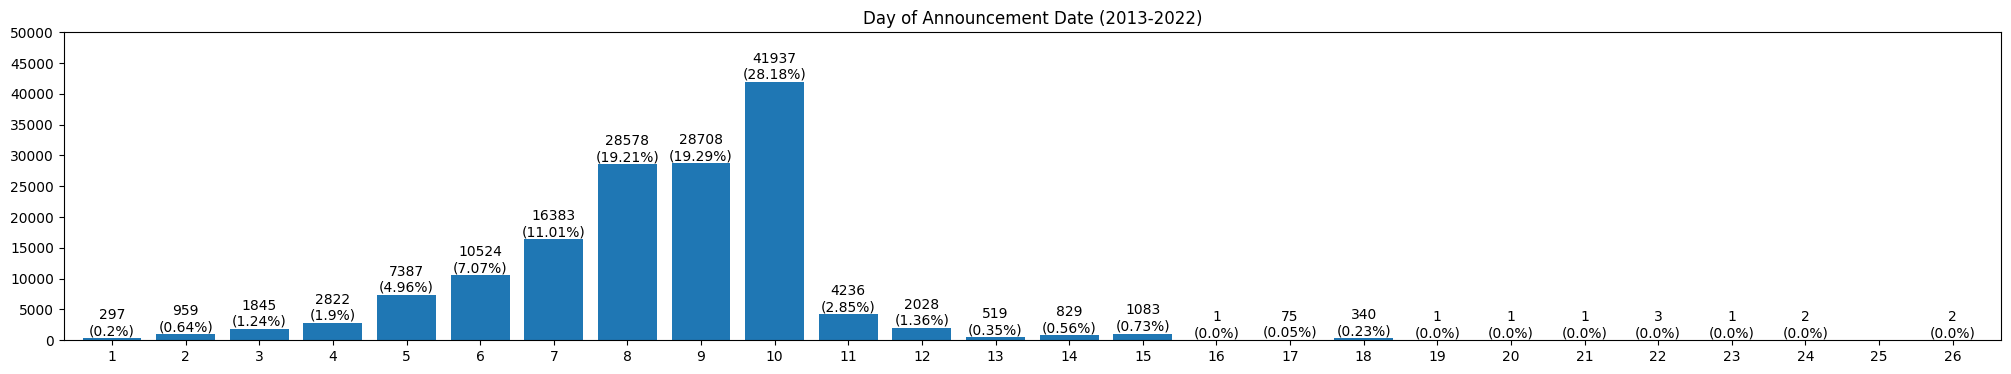

In [9]:
# Plot the value counts
plt.figure(figsize = (25,4))
plt.title('Day of Announcement Date (2013-2022)')
plt.bar(data_day_count.index, data_day_count.values)
plt.xticks(np.arange(1, 32, 1))
plt.yticks(np.arange(0, 55000, 5000))
# Add value labels on top of the bars
for i, v in enumerate(data_day_count.values):
    plt.text(data_day_count.index[i], v + 0.5, f'{str(v)}\n({round(v / data_day.size * 100, 2)}%)', ha = 'center', va = 'bottom')
plt.margins(x = 0.01)  # Adjust only the x-axis padding
plt.show()

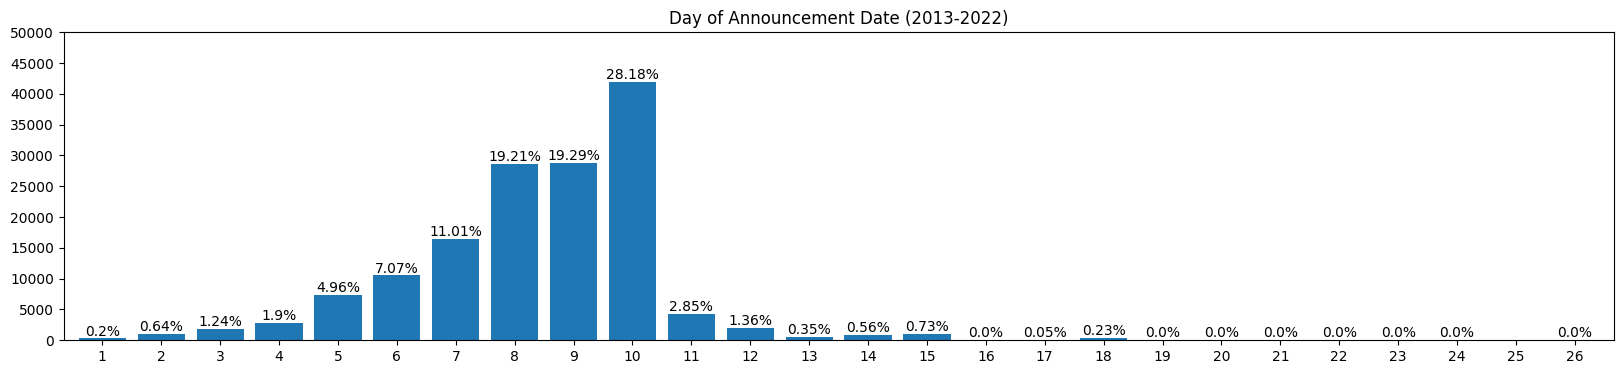

In [13]:
# Plot the value counts
plt.figure(figsize = (20,4))
plt.title('Day of Announcement Date (2013-2022)')
plt.bar(data_day_count.index, data_day_count.values)
plt.xticks(np.arange(1, 32, 1))
plt.yticks(np.arange(0, 55000, 5000))
# Add value labels on top of the bars
for i, v in enumerate(data_day_count.values):
    plt.text(data_day_count.index[i], v + 0.5, f'{round(v / data_day.size * 100, 2)}%', ha = 'center', va = 'bottom')
plt.margins(x = 0.01)  # Adjust only the x-axis padding
plt.show()

#### **4.1.2 2018-2022**


In [10]:
data_day_2018 = data_day.copy().iloc[:, 60:]
data_day_concat_2018 = pd.concat([data_day_2018[column] for column in data_day_2018.columns], ignore_index=True)
data_day_count_2018 = data_day_concat_2018.value_counts()
data_day_count_2018

10.0    19641
9.0     14393
8.0     14364
7.0      8153
6.0      5382
5.0      3787
11.0     2020
4.0      1554
12.0     1548
3.0      1068
14.0      822
15.0      610
2.0       588
13.0      217
1.0       163
17.0       75
24.0        2
26.0        1
21.0        1
19.0        1
dtype: int64

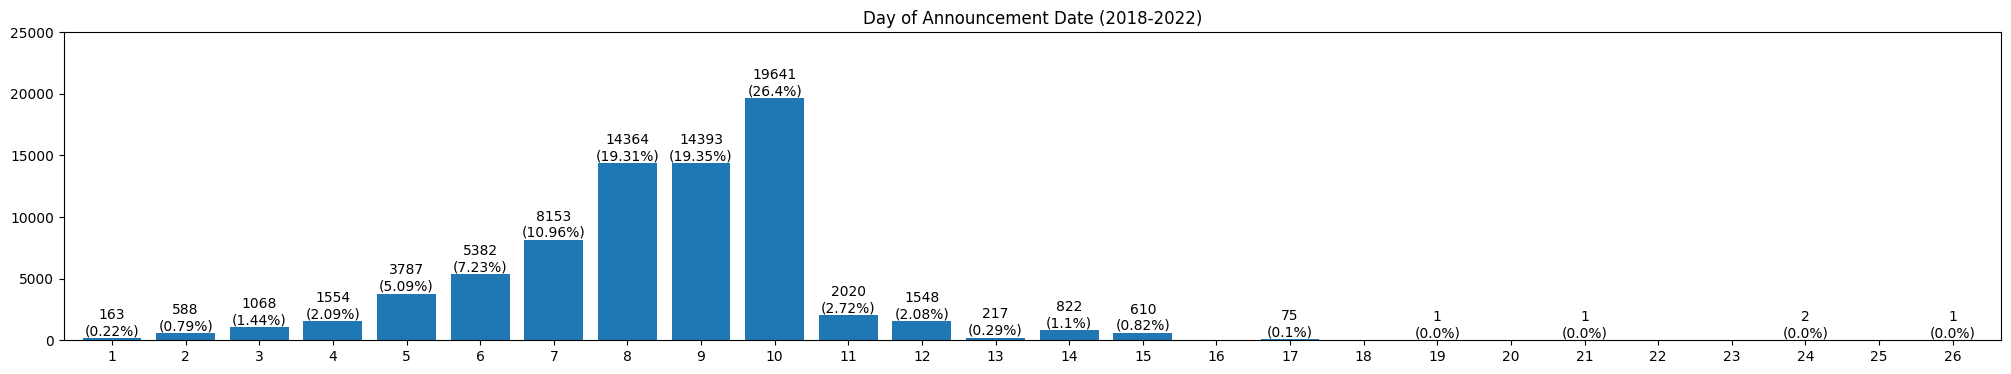

In [11]:
# Plot the value counts
plt.figure(figsize = (25,4))
plt.title('Day of Announcement Date (2018-2022)')
plt.bar(data_day_count_2018.index, data_day_count_2018.values)
plt.xticks(np.arange(1, 32, 1))
plt.yticks(np.arange(0, 30000, 5000))
# Add value labels on top of the bars
for i, v in enumerate(data_day_count_2018.values):
    plt.text(data_day_count_2018.index[i], v + 0.5, f'{str(v)}\n({round(v / data_day_2018.size * 100, 2)}%)', ha = 'center', va = 'bottom')
plt.margins(x = 0.01)  # Adjust only the x-axis padding
plt.show()

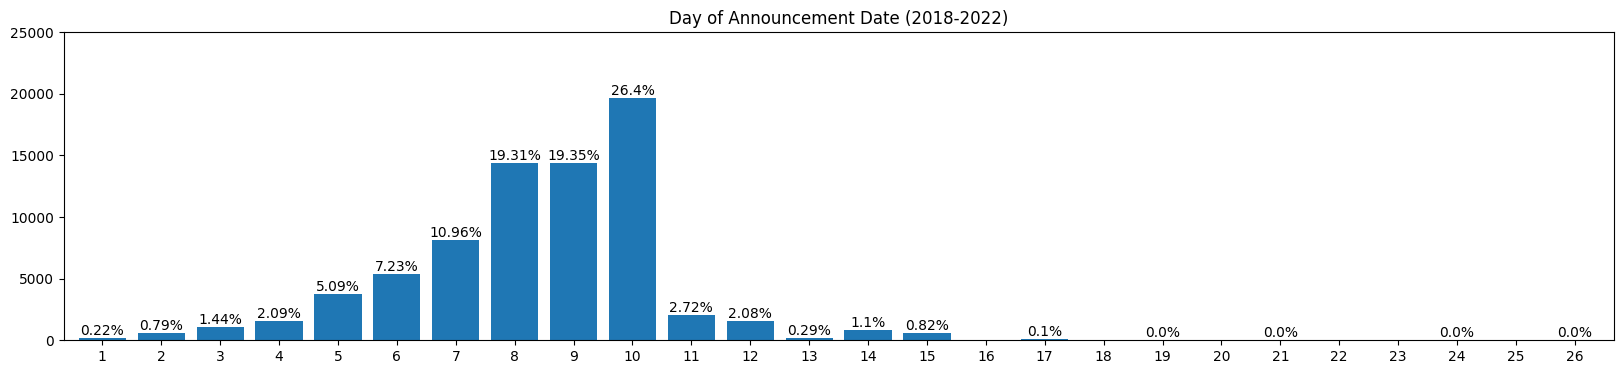

In [14]:
# Plot the value counts
plt.figure(figsize = (20,4))
plt.title('Day of Announcement Date (2018-2022)')
plt.bar(data_day_count_2018.index, data_day_count_2018.values)
plt.xticks(np.arange(1, 32, 1))
plt.yticks(np.arange(0, 30000, 5000))
# Add value labels on top of the bars
for i, v in enumerate(data_day_count_2018.values):
    plt.text(data_day_count_2018.index[i], v + 0.5, f'{round(v / data_day_2018.size * 100, 2)}%', ha = 'center', va = 'bottom')
plt.margins(x = 0.01)  # Adjust only the x-axis padding
plt.show()

### **4.2 Week of Announcement Date**


In [16]:
data_week = data.copy()
for column in data_week.columns:
    data_week[column] = data_week[column].apply(lambda x: datetime.strftime(x, '%A') if not pd.isna(x) else np.nan)

data_week

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,Monday,Friday,Wednesday,Friday,Monday,Wednesday,Friday,Tuesday,Friday,Monday,...,Monday,Tuesday,Friday,Monday,Wednesday,Monday,Thursday,Thursday,Friday,Tuesday
1102 亞泥,Friday,Friday,Wednesday,Friday,Monday,Wednesday,Friday,Tuesday,Wednesday,Friday,...,Friday,Tuesday,Friday,Friday,Wednesday,Thursday,Friday,Thursday,Friday,Tuesday
1103 嘉泥,Monday,Monday,Wednesday,Friday,Monday,Wednesday,Friday,Tuesday,Friday,Monday,...,Monday,Tuesday,Friday,Monday,Wednesday,Monday,Tuesday,Thursday,Monday,Tuesday
1104 環泥,Friday,Friday,Wednesday,Friday,Monday,Wednesday,Friday,Tuesday,Wednesday,Friday,...,Monday,Tuesday,Friday,Friday,Wednesday,Monday,Tuesday,Thursday,Friday,Tuesday
1108 幸福,Monday,Friday,Tuesday,Friday,Friday,Wednesday,Friday,Monday,Tuesday,Friday,...,Monday,Monday,Thursday,Friday,Monday,Thursday,Friday,Tuesday,Friday,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,Thursday,Thursday,Tuesday,Friday,Friday,Monday,Thursday,Friday,Tuesday,Wednesday,...,Friday,Tuesday,Thursday,Friday,Tuesday,Monday,Tuesday,Thursday,Friday,Tuesday
9955 佳龍,Monday,Friday,Tuesday,Friday,Monday,Tuesday,Friday,Tuesday,Wednesday,Friday,...,Friday,Tuesday,Friday,Wednesday,Wednesday,Tuesday,Friday,Wednesday,Friday,Tuesday
9958 世紀鋼,Friday,Sunday,Tuesday,Friday,Monday,Wednesday,Friday,Tuesday,Wednesday,Friday,...,Monday,Monday,Thursday,Monday,Wednesday,Thursday,Friday,Thursday,Friday,Monday


#### **4.2.1 2013-2022**


In [17]:
data_week_concat = pd.concat([data_week[column] for column in data_week.columns], ignore_index=True)
data_week_count = data_week_concat.value_counts()
data_week_count

Friday       41711
Monday       31139
Thursday     26323
Tuesday      24486
Wednesday    23246
Saturday      1195
Sunday         462
dtype: int64

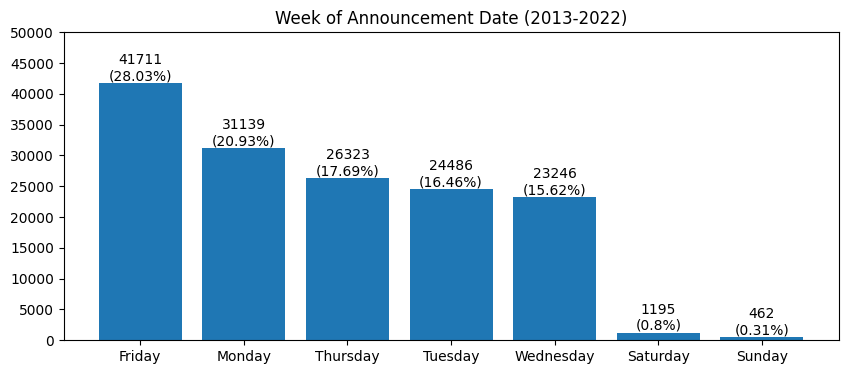

In [18]:
# Plot the value counts
plt.figure(figsize = (10,4))
plt.title('Week of Announcement Date (2013-2022)')
plt.bar(data_week_count.index, data_week_count.values)
plt.yticks(np.arange(0, 55000, 5000))
# Add value labels on top of the bars
for i, v in enumerate(data_week_count.values):
    plt.text(i, v + 0.5, f'{str(v)}\n({round(v / data_week.size * 100, 2)}%)', ha = 'center', va = 'bottom')
plt.show()

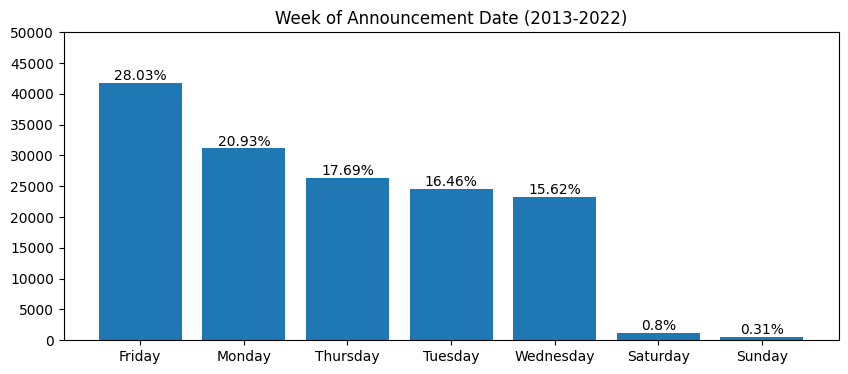

In [19]:
# Plot the value counts
plt.figure(figsize = (10,4))
plt.title('Week of Announcement Date (2013-2022)')
plt.bar(data_week_count.index, data_week_count.values)
plt.yticks(np.arange(0, 55000, 5000))
# Add value labels on top of the bars
for i, v in enumerate(data_week_count.values):
    plt.text(i, v + 0.5, f'{round(v / data_week.size * 100, 2)}%', ha = 'center', va = 'bottom')
plt.show()

#### **4.2.1 2018-2022**


In [20]:
data_week_2018 = data_week.copy().iloc[:, 60:]
data_week_concat_2018 = pd.concat([data_week_2018[column] for column in data_week_2018.columns], ignore_index=True)
data_week_count_2018 = data_week_concat_2018.value_counts()
data_week_count_2018

Friday       20312
Monday       15921
Thursday     13619
Tuesday      12962
Wednesday    10889
Saturday       478
Sunday         209
dtype: int64

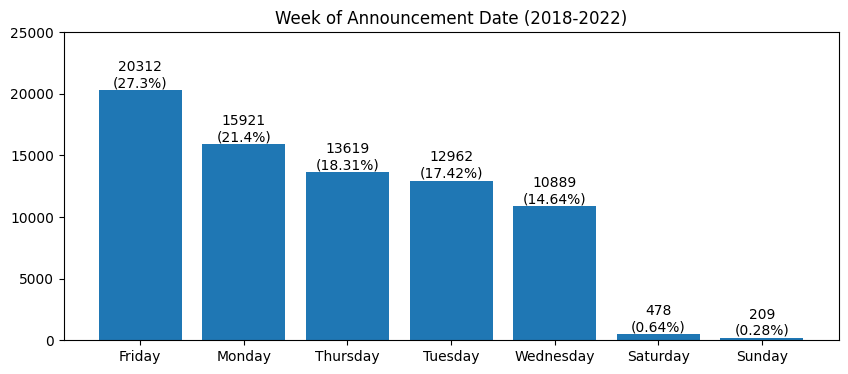

In [22]:
# Plot the value counts
plt.figure(figsize = (10,4))
plt.title('Week of Announcement Date (2018-2022)')
plt.bar(data_week_count_2018.index, data_week_count_2018.values)
plt.yticks(np.arange(0, 30000, 5000))
# Add value labels on top of the bars
for i, v in enumerate(data_week_count_2018.values):
    plt.text(i, v + 0.5, f'{str(v)}\n({round(v / data_week_2018.size * 100, 2)}%)', ha = 'center', va = 'bottom')
plt.show()

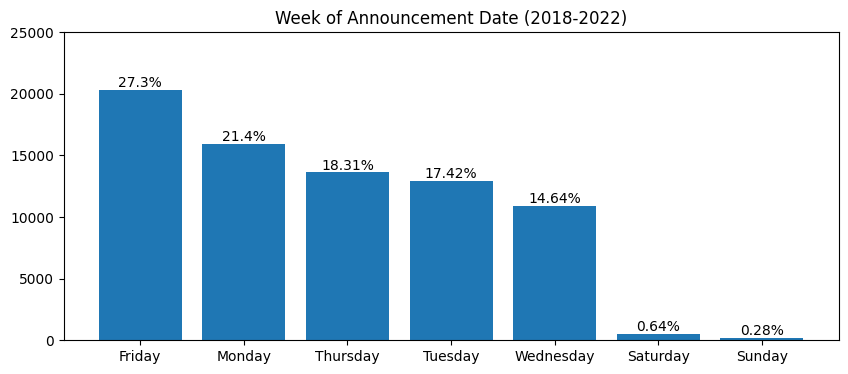

In [24]:
# Plot the value counts
plt.figure(figsize = (10,4))
plt.title('Week of Announcement Date (2018-2022)')
plt.bar(data_week_count_2018.index, data_week_count_2018.values)
plt.yticks(np.arange(0, 30000, 5000))
# Add value labels on top of the bars
for i, v in enumerate(data_week_count_2018.values):
    plt.text(i, v + 0.5, f'{round(v / data_week_2018.size * 100, 2)}%', ha = 'center', va = 'bottom')
plt.show()